In [1]:
import sys
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt


In [2]:
def univariate_plotter_old(feature='No feature passed', train_sub_col_target=0, target_col='1', bins=10):
    X_train = train_sub_col_target.copy()
    X_train['y'] = train_sub_col_target[target_col]
    # for col_number in range(7, 8):
    col = feature  # X_train.columns[col_number]
    print('Below are the actual found rates wrt ' + col)
    nan_flag = 0
    if pd.isnull(X_train[col]).sum() > 0:
        nan_flag = 1
        print("NANs present")
    bins = bins
    # cuts=[0]
    cuts = []
    prev_cut = -1000000000
    if nan_flag != 1:
        for i in range(bins + 1):
            next_cut = np.percentile(train_sub_col_target[col], i * 100 / bins)
            if next_cut != prev_cut:
                cuts.append(next_cut)
            prev_cut = next_cut  # .copy()
        # print(cuts)
        cuts[0] = cuts[0] - 1
        cuts[len(cuts) - 1] = cuts[len(cuts) - 1] + 1
        # cuts=[ -1, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.05, 2]
        cut_series = pd.cut(X_train[col], cuts)
    else:
        train_sub_col_no_nan = train_sub_col_target[col].copy()
        train_sub_col_no_nan[np.isinf(train_sub_col_no_nan)] = np.nan
        train_sub_col_no_nan = train_sub_col_no_nan[~np.isnan(train_sub_col_no_nan)]
        X_train[col][np.isinf(X_train[col])] = np.nan
        X_train_no_nan = X_train[~np.isnan(X_train[col])]

        for i in range(bins + 1):
            next_cut = np.percentile(train_sub_col_no_nan, i * 100 / bins)
            if next_cut != prev_cut:
                cuts.append(next_cut)
            prev_cut = next_cut.copy()

        cuts[0] = cuts[0] - 0.00001
        cuts[len(cuts) - 1] = cuts[len(cuts) - 1] + 0.00001
        # cuts=[ -1, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.05]
        cut_series = pd.cut(X_train_no_nan[col], cuts)
        cut_series_test = pd.cut(X_test_no_nan[col], cuts)
        # print(cuts)
    if nan_flag != 1:

        grouped = X_train.groupby([cut_series], as_index=True).agg({'y': [np.size, np.mean], col: [np.mean]})
        grouped1 = pd.DataFrame(grouped.index)
        grouped = X_train.groupby([cut_series], as_index=False).agg({'y': [np.size, np.mean], col: [np.mean]})
        grouped.columns = ['_'.join(cols).strip() for cols in grouped.columns.values]

        grouped = pd.DataFrame(grouped.to_records())
        grouped1['y_mean'] = grouped['y_mean']
        grouped1['y_sum'] = grouped['y_size']
        grouped1[col + '_mean'] = grouped[col + '_mean']

    else:
        grouped = X_train_no_nan.groupby([cut_series], as_index=True).agg({'y': [np.size, np.mean]})
        grouped1 = pd.DataFrame(grouped.index)
        grouped = X_train_no_nan.groupby([cut_series], as_index=False).agg({'y': [np.size, np.mean]})
        grouped.columns = ['_'.join(cols).strip() for cols in grouped.columns.values]
        grouped = pd.DataFrame(grouped.to_records())
        grouped1['y_mean'] = grouped['y_mean']
        grouped1['y_sum'] = grouped['y_sum']
        grouped1_nan = grouped1[0:1]
        grouped1_nan[col] = (grouped1_nan[col]).astype('str')
        grouped1_nan[col][0] = 'Nan'
        grouped1_nan['y_mean'][0] = y_train[np.isnan(X_train[col])].mean()
        grouped1_nan['y_sum'][0] = y_train[np.isnan(X_train[col])].sum()
        grouped1 = pd.concat([grouped1, grouped1_nan])

    grouped1 = grouped1.reset_index(drop=True)
    a = plt.plot(grouped1['y_mean'], marker='o')
    plt.xticks(np.arange(len(grouped1)), (grouped1[col]).astype('str'), rotation=45)
    plt.xlabel('Bins of ' + feature)
    plt.ylabel('% Incomplete Orders')
    plt.show()
    b = plt.bar(np.arange(len(grouped1)), grouped1['y_sum'], alpha=0.5)
    plt.xticks(np.arange(len(grouped1)), (grouped1[col]).astype('str'), rotation=45)
    plt.xlabel('Bins of ' + feature)
    plt.ylabel('Bin-wise Population')
    plt.show()
    return(grouped1)


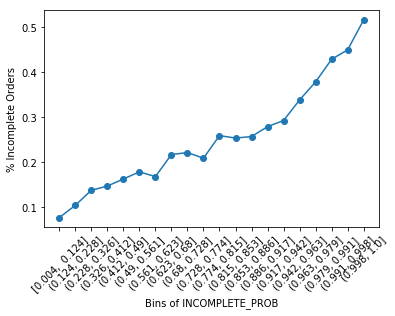

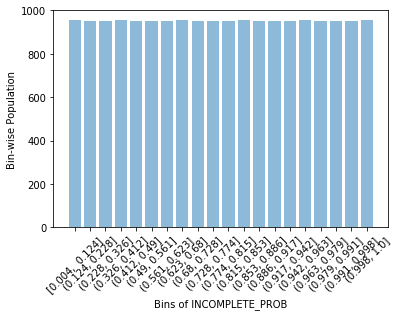

,INCOMPLETE_PROB,Samples_in_bin,INCOMPLETE_FLG_mean,INCOMPLETE_PROB_mean
0,"[0.004, 0.124]",954,0.076520,0.067413
1,"(0.124, 0.228]",953,0.103882,0.175965
2,"(0.228, 0.326]",953,0.137461,0.277213
3,"(0.326, 0.412]",954,0.146751,0.370661
4,"(0.412, 0.49]",953,0.162644,0.451652
5,"(0.49, 0.561]",953,0.178384,0.526887
6,"(0.561, 0.623]",953,0.167891,0.591918
7,"(0.623, 0.68]",954,0.216981,0.651644
8,"(0.68, 0.728]",953,0.221406,0.704070
9,"(0.728, 0.774]",953,0.208814,0.750941


In [5]:
data = data1.copy()
feature='INCOMPLETE_PROB'
bins=20
target_col='INCOMPLETE_FLG'

cuts = []
prev_cut = min(data[feature]) - 1
if pd.isnull(data[feature]).sum() == 0:
    for i in range(bins + 1):
        next_cut = np.percentile(data[feature], i * 100 / bins)
        if next_cut != prev_cut:
            cuts.append(next_cut)
        else:
            print('Reduced the number of bins due to less variation in feature')
        prev_cut = next_cut
    cuts[0] = cuts[0] - 1
    cut_series = pd.cut(data[feature], cuts)
    
    grouped = data.groupby([cut_series], as_index=True).agg({target_col: [np.size, np.mean], feature: [np.mean]})
    grouped.columns = ['_'.join(cols).strip() for cols in grouped.columns.values]
    grouped[grouped.index.name] = grouped.index
    grouped.reset_index(inplace=True, drop=True)
    grouped = grouped[[feature] + list(grouped.columns[0:3])]
    grouped = grouped.rename(index=str, columns={target_col+'_size': 'Samples_in_bin'})
    
grouped = grouped.reset_index(drop=True)
corrected_bin_name = '[' + str(min(data[feature])) + ', ' + str(grouped.loc[0, feature]).split(',')[1]
grouped[feature] = grouped[feature].cat.add_categories(corrected_bin_name)
grouped.loc[0, feature] = corrected_bin_name

plt.plot(grouped[target_col+'_mean'], marker='o')
plt.xticks(np.arange(len(grouped)), (grouped[feature]).astype('str'), rotation=45)
plt.xlabel('Bins of ' + feature)
plt.ylabel('% Incomplete Orders')
plt.show()
plt.bar(np.arange(len(grouped)), grouped['Samples_in_bin'], alpha=0.5)
plt.xticks(np.arange(len(grouped)), (grouped[feature]).astype('str'), rotation=45)
plt.xlabel('Bins of ' + feature)
plt.ylabel('Bin-wise Population')
plt.show()
#return(grouped)
grouped

In [ ]:
else:
    print("NANs present")
    data_feat_nonan = data[feature].copy()
    data_feat_nonan[np.isinf(data_feat_nonan)] = np.nan
    data_feat_nonan = data_feat_nonan[~np.isnan(data_feat_nonan)]
    data[feature][np.isinf(data[feature])] = np.nan
    data_nonan = data[~np.isnan(data[feature])]

    for i in range(bins + 1):
        next_cut = np.percentile(data_feat_nonan, i * 100 / bins)
        if next_cut != prev_cut:
            cuts.append(next_cut)
        prev_cut = next_cut.copy()

    cuts[0] = cuts[0] - 1
    cut_series = pd.cut(data_nonan[feature], cuts)

    grouped = data_nonan.groupby([cut_series], as_index=True).agg({target_col: [np.size, np.mean]})
    grouped1 = pd.DataFrame(grouped.index)
    grouped = data_nonan.groupby([cut_series], as_index=False).agg({target_col: [np.size, np.mean]})
    grouped.columns = ['_'.join(cols).strip() for cols in grouped.columns.values]
    grouped = pd.DataFrame(grouped.to_records())
    grouped1[target_col+'_mean'] = grouped[target_col+'_mean']
    grouped1[target_col+'_sum'] = grouped[target_col+'_sum']
    grouped1_nan = grouped1[0:1]
    grouped1_nan[feature] = (grouped1_nan[feature]).astype('str')
    grouped1_nan[feature][0] = 'Nan'
    grouped1_nan[target_col+'_mean'][0] = y_train[np.isnan(data[feature])].mean()
    grouped1_nan[target_col+'_sum'][0] = y_train[np.isnan(data[feature])].sum()
    grouped1 = pd.concat([grouped1, grouped1_nan])


In [4]:
data1 = pd.read_csv('data/incomplete_orders_with_type_schedule.csv')


Below are the actual found rates wrt INCOMPLETE_PROB


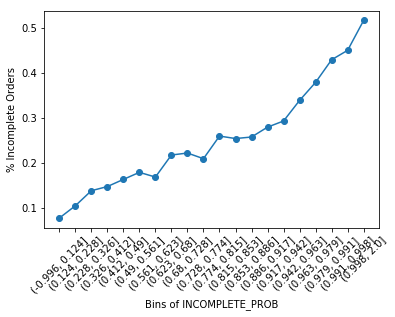

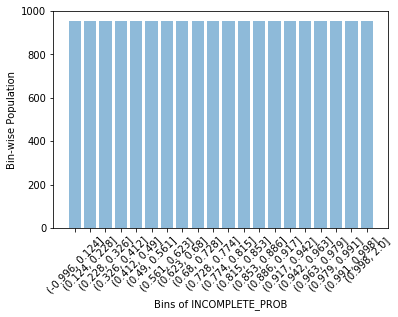

,INCOMPLETE_PROB,y_mean,y_sum,INCOMPLETE_PROB_mean
0,"(-0.996, 0.124]",0.076520,954,0.067413
1,"(0.124, 0.228]",0.103882,953,0.175965
2,"(0.228, 0.326]",0.137461,953,0.277213
3,"(0.326, 0.412]",0.146751,954,0.370661
4,"(0.412, 0.49]",0.162644,953,0.451652
5,"(0.49, 0.561]",0.178384,953,0.526887
6,"(0.561, 0.623]",0.167891,953,0.591918
7,"(0.623, 0.68]",0.216981,954,0.651644
8,"(0.68, 0.728]",0.221406,953,0.704070
9,"(0.728, 0.774]",0.208814,953,0.750941


In [90]:
univariate_plotter_old(feature='INCOMPLETE_PROB', bins=20, target_col='INCOMPLETE_FLG', train_sub_col_target=data1)


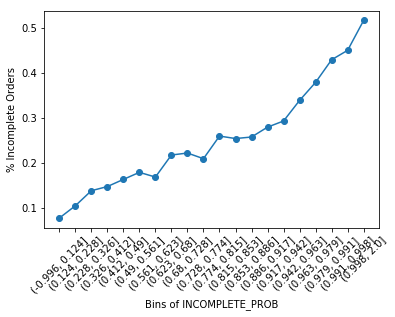

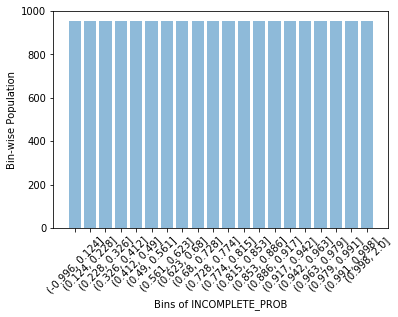

,INCOMPLETE_PROB,INCOMPLETE_FLG_mean,INCOMPLETE_FLG_sum,INCOMPLETE_PROB_mean
0,"(-0.996, 0.124]",0.076520,954,0.067413
1,"(0.124, 0.228]",0.103882,953,0.175965
2,"(0.228, 0.326]",0.137461,953,0.277213
3,"(0.326, 0.412]",0.146751,954,0.370661
4,"(0.412, 0.49]",0.162644,953,0.451652
5,"(0.49, 0.561]",0.178384,953,0.526887
6,"(0.561, 0.623]",0.167891,953,0.591918
7,"(0.623, 0.68]",0.216981,954,0.651644
8,"(0.68, 0.728]",0.221406,953,0.704070
9,"(0.728, 0.774]",0.208814,953,0.750941


In [89]:
univariate_plotter(feature='INCOMPLETE_PROB', bins=20, target_col='INCOMPLETE_FLG', input_data=data1)
